# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

#Definindo a paleta de cores
colors= ["#596abe", "#b7521f", "#00865f","#59bead","#bead59","#7b59be"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [2]:
!pip install seaborn --upgrade -q


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## 1. Leitura do conjunto de dados

In [3]:
df = pd.read_csv('../data/raw/Sleep_Efficiency.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0,0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,1,1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,2,2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,3,3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,4,4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
#Tipo de dados de cada coluna 
df.dtypes

Unnamed: 0.1                int64
Unnamed: 0                  int64
ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

In [5]:
#Registros duplicados 
df[df.duplicated()]

,Unnamed: 0.1,Unnamed: 0,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


## 2. Descrição dos dados

### 2.1 Contextualização 

O sono é uma função biológica essencial para processos como a consolidação da memória, a visão binocular, a termorregulação, a conservação e restauração da energia e o metabolismo energético cerebral. Devido a essas funções, perturbações do sono podem causar sérios impactos no funcionamento físico, ocupacional, cognitivo e social, além de comprometer a qualidade de vida. Os transtornos do sono resultam em perda da qualidade de vida, disfunção autonômica, redução do desempenho profissional e acadêmico, aumento da incidência de transtornos psiquiátricos e diminuição da vigilância, o que afeta a segurança pessoal e eleva o risco de acidentes. Pessoas que dormem mal têm maior predisposição a morbidades, menor expectativa de vida e envelhecimento precoce.

O ciclo sono-vigília segue um ritmo circadiano, sincronizado com fatores ambientais, como a alternância entre dia e noite, horários escolares, de trabalho e de lazer, além das atividades familiares, os quais influenciam naturalmente o ciclo de sono. No entanto, o ciclo sono-vigília é também regulado internamente pelo núcleo supraquiasmático no hipotálamo, que atua como o relógio biológico para os mamíferos.

A eficiência do sono é um indicador relevante desse processo, referindo-se à proporção de tempo efetivamente dormido em comparação ao tempo total na cama. Por exemplo, se uma pessoa passa 8 horas na cama, mas dorme apenas 4 dessas horas, sua eficiência do sono é de 50%. Indivíduos que passam a maior parte do tempo na cama dormindo têm alta eficiência de sono, enquanto aqueles que passam uma parte significativa do tempo acordados na cama apresentam baixa eficiência, como ocorre frequentemente na insônia. Portanto, entender e medir a eficiência do sono é crucial para avaliar a qualidade do descanso e seu impacto na saúde e na qualidade de vida. 

#### Sobre o ciclo do sono

##### **Estágio 1 Não-REM** 
Considerado ainda no estado de vigília (acordado), você começa a entrar na fase da transição entre a vigília e o sono. Tem duração de poucos minutos. Os batimentos cardíacos, respiração e movimentos dos olhos ficam lentos e seus músculos começam a relaxar, com espasmos ocasionais. As ondas cerebrais começam a se modificar.

##### **Estágio 2 Sono Leve**
É uma fase intermediária antes de um sono mais profundo. Isto é, o batimento cardíaco e a respiração diminuem, e os músculos relaxam mais. Dessa maneira, a temperatura corporal cai, e o movimento dos olhos cessa.

##### **Estágio 3 Sono Profundo**
Este é um estágio mais profundo do sono não REM. Este estágio é absolutamente necessário para a saúde do nosso cérebro e seu desempenho máximo.

##### **Estágio 4 Sono REM**
Durante o sono REM a frequência cardíaca e respiração aceleram, e esse estágio é caracterizado por atividade cerebral elevada, frequentemente resultando em sonhos vívidos e intensos. O sono REM desempenha um papel crucial, pois ativa regiões específicas do cérebro associadas ao aprendizado e contribui para uma produção aumentada de proteínas essenciais.


### 2.2 Conjunto de dados

In [6]:
display (df)

,Unnamed: 0.1,Unnamed: 0,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0,0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,1,1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,2,2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,3,3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,4,4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,448,448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,449,449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,450,450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


### 2.3 Dados faltantes ou nulos

In [7]:
# Analisando os dados faltantes ou nulos (NaN)
total_nan_by_column = df.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)
total_nans = df.isnull().sum().sum()

if total_nans == 0:
    print("O conjunto não possui dados faltantes.")
else:
    print(f"O conjunto possui {total_nans} linhas com dados faltantes. \n")

display(total_nan_by_column)

O conjunto possui 65 linhas com dados faltantes. 



Caffeine consumption    25
Awakenings              20
Alcohol consumption     14
Exercise frequency       6
dtype: int64

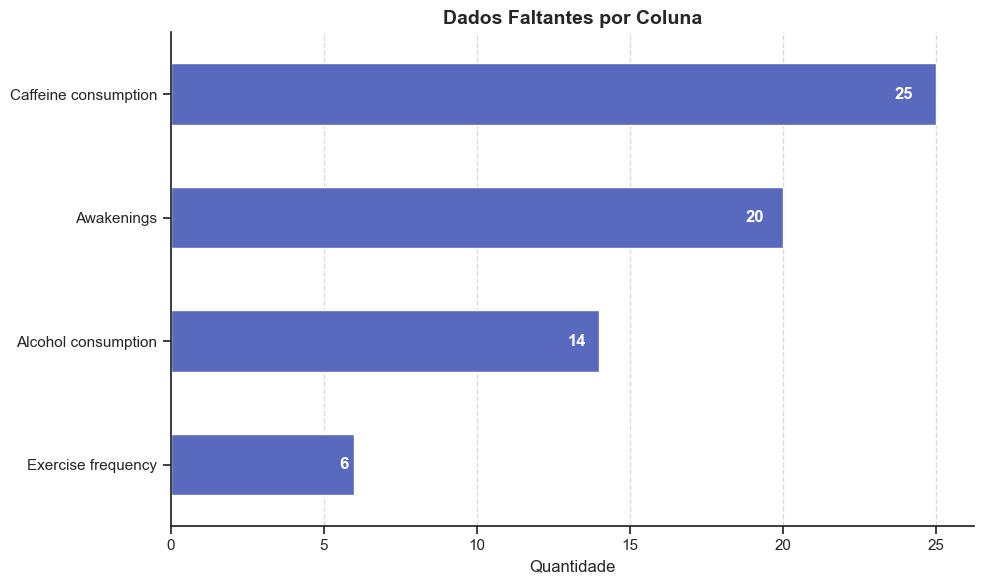

In [8]:
# Dados faltantes em visualização de barras
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values()
plt.figure(figsize=(10, 6))

ax = missing_values.plot(kind='barh', color="#596abe")
plt.title('Dados Faltantes por Coluna', fontweight='bold', fontsize=14)
plt.xlabel('Quantidade', fontsize=12)

for index, value in enumerate(missing_values):
    ax.text(value - (value * 0.03), index, str(value), 
            va='center', ha='right', color='white', fontweight='bold', fontsize=12)
    
plt.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout() 
plt.show()

### 2.4 Dados discrepantes (Outliers)

*Número de Outliers por Coluna:* 


Deep sleep percentage     60
Sleep duration            16
Caffeine consumption       4
Light sleep percentage     2
dtype: int64

,Deep sleep percentage,Sleep duration,Caffeine consumption,Light sleep percentage
0,70,6.0,0.0,12
1,28,7.0,0.0,53
2,70,8.0,0.0,10
3,25,6.0,50.0,52
4,55,8.0,0.0,18


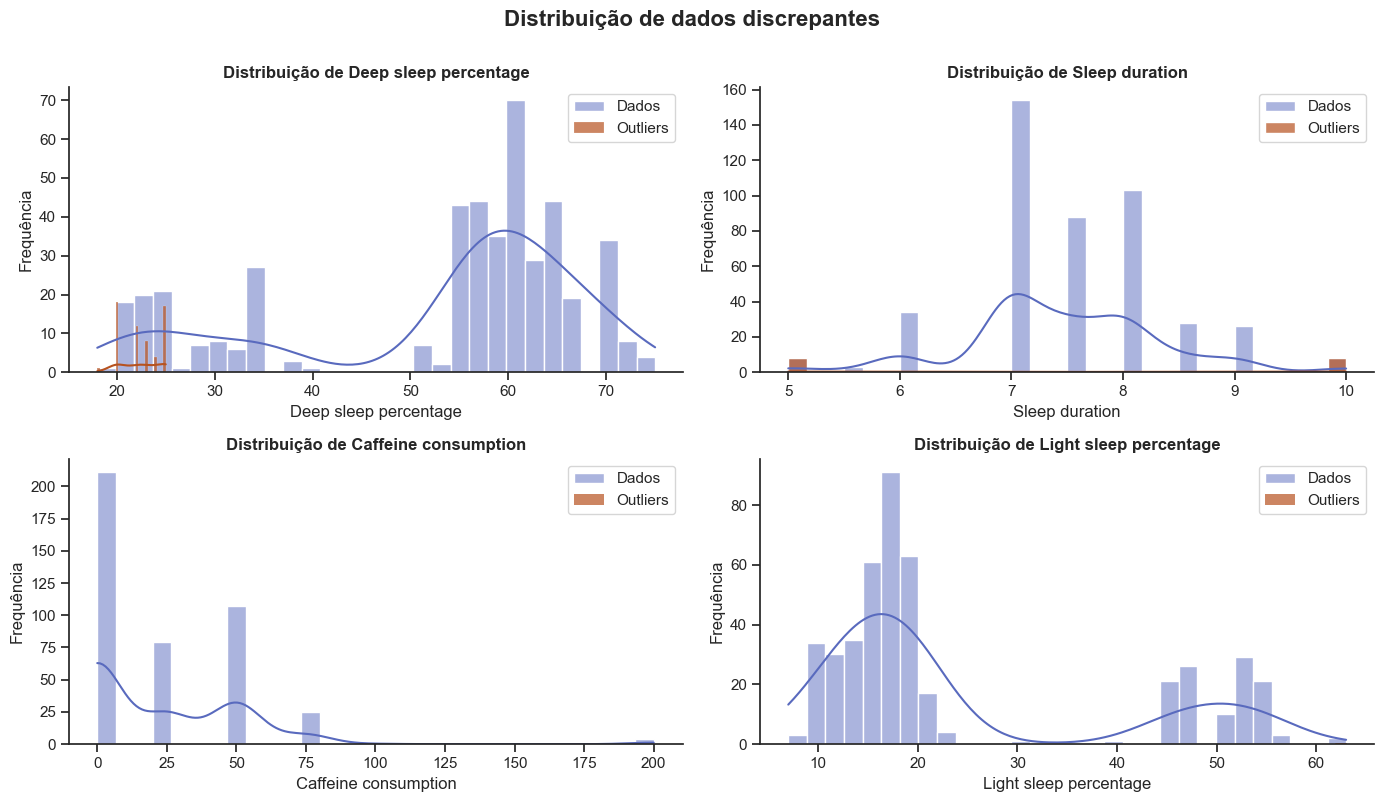

In [9]:
# Identificação de outliers usando o método do Intervalo Interquantil (IQR)
numeric_df = df.select_dtypes(include=[np.number])
factor = 1.5

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (data < lower_bound) | (data > upper_bound)

# Aplicando a função a todas as colunas numéricas
outliers = numeric_df.apply(detect_outliers_iqr)

# Filtrando os dados para mostrar apenas os outliers
outliers_summary = outliers.sum().sort_values(ascending=False)
outliers_summary = outliers_summary[outliers_summary > 0]
outliers_data = numeric_df.loc[:, outliers_summary.index]
display(Markdown("*Número de Outliers por Coluna:* \n"))
display(outliers_summary)
print("\n")
display(outliers_data.head())
print("\n")

# Visualização gráfica
num_cols = outliers_data.shape[1]
num_rows = (num_cols + 1) // 2  
fig = plt.figure(figsize=(14, num_rows * 4))

fig.suptitle('Distribuição de dados discrepantes', fontweight='bold', fontsize=16, y=1)

for i, column in enumerate(outliers_data.columns, 1):
    ax = plt.subplot(num_rows, 2, i)
    sns.histplot(numeric_df[column], bins=30, kde=True, color="#596abe", label='Dados')
    sns.histplot(numeric_df[column][outliers[column]], bins=30, kde=True, color=colors[1], label='Outliers', alpha=0.7)
    ax.set_title(f'Distribuição de {column}', fontsize=12, fontweight='bold')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequência')
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 2.4 Dicionário de dados 

In [10]:
#Diciónario de dados
dicionary = pd.read_csv("../data/external/dictionary.csv")
display(HTML(dicionary.to_html(index=False)))

variavel,descricao,tipo,subtipo
ID,Identificador único do sujeito,Quantitativo,Discreta
Age,Idade do sujeito,Quantitativo,Discreta
Gender,Gênero do sujeito,Qualitativo,Nominal
Bedtime,Hora em que o sujeito vai para a cama,Cíclica,Cíclica
Wakeup time,Hora em que o sujeito acorda,Cíclica,Cíclica
Sleep duration,Duração total do sono em horas,Cíclica,Cíclica
Sleep efficiency,Representa a porcentagem de tempo que o sujeito passou dormindo enquanto estava na cama,Quantitativo,Contínua
REM sleep percentage,"Porcentagem do tempo total de sono que foi gasto no estágio REM, fase do sono associada aos sonhos",Quantitativo,Contínua
Deep sleep percentage,"Porcentagem do tempo total de sono que foi gasto no estágio de sono profundo, fase do sono que é mais restauradora",Quantitativo,Contínua
Light sleep percentage,"Porcentagem do tempo total de sono que foi gasto no estágio de sono leve, fase do sono mais superficial",Quantitativo,Contínua


O dataframe possui ao todo **15** variáveis, sendo elas:
- **4** Quantitativas discretas
- **6** Quantitativas Contínuas
- **2** Qualitativas Nominal
- **3** Cíclicas 

## 2. Perguntas de partida e hipóteses

- Quem tem uma maior quantidade de sono consequentemente vai ter uma maior eficiência do sono?
  
    **Hipótese** : A quantidade de horas dormida está correlacionada a efeciência do sono.

- Quem consumiu cafeína, alcool e cigarro teve menos horas de sono ?

   **Hipótese** Fotores extrinsecos estão correlacionado a uma noite mal dormida. 

- Quem se exercitou durante o dia terá uma maior qualidade de sono ?

   **Hipótese** Exercícios contribuem para uma melhor noite de sono.

- O quantitativo de vezes que o individuo acorda na noite pode interferir na qualidade do sono?

  **Hipótese** Interromper o cilco do sono pode inteferir na qualidade do sono.

- Qual é a relação entre a idade, o gênero e a duração do sono?

   **Hipótese**  A idade e o gênero influenciam a duração média do sono dos indivíduos, devido a diferentes fatores biológicos e necessidades fisiológicas. 

## 3. Insights

### 3.1 - Quem tem uma maior quantidade de sono consequentemente vai ter uma maior eficiência do sono?
    Hipótese: A quantidade de horas dormida está correlacionada a efeciência do sono.

In [ ]:
#Criando o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x= 'Sleep duration', y= 'Sleep efficiency', alpha=0.7)

#Adicionando a linha de tedência para visualizar a correlação
sns.regplot(data=df, x='Sleep duration', y='Sleep efficiency', scatter=False, color=colors[1], line_kws={'label':"Tendência"})

#Configurando títulos
plt.title('Relação entre Duração do Sono e Eficiência do Sono', fontweight='bold', fontsize=14, y=1.02)

plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Eficiência do Sono (%)')

plt.show()

- Não há evidências de que a duração do sono esteja diretamente ligada à eficiência, ou seja, dormir mais horas não garante maior eficiência do sono.  

In [ ]:
#Criando uma nova coluna para categorizar a duração de sonoem faixas
bins=[0,5,6,7,8,9,10]
labels=['5', '6','7', '8', '9', '10' ]
df['Sleep Duration Category'] = pd.cut(df['Sleep duration'], bins=bins, labels=labels, include_lowest=True)

#Criando o boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Sleep Duration Category', y='Sleep efficiency', color=colors[0], dodge=False)

# Configurando títulos 
plt.title('Eficiência do Sono x Duração do Sono', fontweight='bold', fontsize=14, y=1.02)
plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Eficiência do Sono (%)')

plt.tight_layout()
plt.show()


### 3.2 Quem consumiu cafeína, álcool e cigarro teve menos horas de sono ?

    Hipótese: Consumir cafeína perto da hora de dormir pode estar associado a uma menor quantidade de sono. Esse efeito pode estar relacionado à capacidade da cafeína de estimular o sistema nervoso, dificultando a entrada no sono profundo.
    
    Hipótese: Embora possa parecer que o álcool ajuda a relaxar, ele pode prejudicar a continuidade do sono, resultando em um tempo de descanso total menor e menos restaurador. Esse efeito pode ocorrer porque o álcool perturba a fase REM do sono e aumenta as chances de despertar durante a noite.
    
    Hipótese: O tabagismo está associado a uma menor duração do sono. A nicotina, sendo um estimulante, pode dificultar o relaxamento e interromper o ciclo do sono, especialmente quando o cigarro é consumido próximo da hora de dormir.

In [ ]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(14,6))

#Criando um subplots para visualizar a correlação de cada substância com a duração do sono

#café
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='Caffeine consumption', y='Sleep duration', color=colors[0])
plt.title('Duração do Sono x Consumo de Cafeína', fontweight='bold', fontsize=14, y=1.02)
plt.xlabel('Consumo de Cafeína, registrada em miligramas')
plt.ylabel('Duração do Sono (horas)')

#Álcool
plt.subplot(1, 3, 2)
sns.violinplot(data=df, x='Alcohol consumption', y='Sleep duration', color=colors[1])
plt.title('Duração do Sono x Consumo de Álcool', fontweight='bold', fontsize=14, y=1.02)
plt.xlabel('Consumo de Álcool, registrada em mililitros')
plt.ylabel('Duração do Sono (horas)')

#Cigarro
plt.subplot(1, 3, 3)
sns.violinplot(data=df, x='Smoking status', y='Sleep duration', color=colors[2])
plt.title('Duração do Sono x Status de Fumante', fontweight='bold', fontsize=14, y=1.02 )
plt.xlabel('Fumante')
plt.ylabel('Duração do Sono (horas)')

#Layout
plt.tight_layout()

plt.show()


- **Consumo de Cafeína:**

A duração do sono entre os grupos que consumiram cafeína em diferentes quantidades parece não variar de maneira significativa. A mediana do sono permanece relativamente estável, independentemente da quantidade de cafeína ingerida.
Porém, para o grupo que consumiu uma quantidade mais alta (acima de 200 mg), há uma diminuição na dispersão e na duração média do sono, indicando que o consumo extremo de cafeína pode estar associado a menos horas de sono.

- **Consumo de Álcool:**

Assim como a cafeína, o consumo de álcool em pequenas quantidades (entre 1 e 4 ml) parece não alterar de forma significativa a duração do sono em comparação com quem não consumiu álcool.
No entanto, observamos que o grupo com o maior consumo (5 ml) apresenta uma mediana de sono mais baixa e uma menor dispersão, o que indica que o álcool em maior quantidade pode estar relacionado a uma redução nas horas de sono.

- **Status de Fumante:**

A análise entre fumantes e não fumantes mostra pouca variação na duração do sono. A mediana e a dispersão do sono são similares entre os dois grupos.
Isso sugere que, no contexto dessa amostra, o status de fumante não parece ter um impacto perceptível na quantidade total de horas de sono

### 3.3 - Quem se exercitou durante o dia terá uma maior qualidade de sono ?
    
    Hipótese: Exercícios contribuem para uma melhor noite de sono.

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sleep duration', y='Sleep efficiency', data=df, hue='Exercise frequency', palette=["#596abe", "#b7521f", "#00865f","#59bead","#bead59","#7b59be"])

#Adicionando título
plt.title('Eficiência do sono por Frequência de Exercícios', fontweight='bold', fontsize=14, y=1.02 )
plt.xlabel('Duração do sono (horas)', fontsize=12)
plt.ylabel('Eficiência do sono (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

#Colocando a legenda 
plt.legend(title='Frequência de exercício', bbox_to_anchor=(1.05,1), loc='upper left')

# Exibir o gráfico
plt.show()


- Este gráfico sugere que a frequência de exercícios pode influenciar na eficiência do sono, especialmente quando a pessoa dorme uma quantidade de horas (7-9 horas).

In [ ]:
df_grouped = df.groupby('Exercise frequency')['Sleep efficiency'].mean().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Exercise frequency', y='Sleep efficiency', data=df_grouped, color=colors[0])

# Adicionar título e labels
plt.title('Eficiência do Sono por Frequência de Exercício', fontweight='bold', fontsize=14, y=1.02 )
plt.xlabel('Frequência de Exercício', fontsize=12)
plt.ylabel('Eficiência do Sono (%)', fontsize=12)
plt.xticks(rotation=0)  
plt.tight_layout()



# Exibir o gráfico
plt.show()

- O gráfico permitirá verificar se há uma tendência de maior duração e eficiência do sono entre aqueles que se exercitam, indicando uma possível associação entre prática de exercícios e melhor qualidade de sono.

### 3.4 O quantitativo de vezes que o individuo acorda na noite pode interferir na qualidade do sono?

    Hipótese Interromper o cilco do sono pode inteferir na qualidade do sono.

In [ ]:
#configurando o tamanho do gráfico
plt.figure(figsize=(10,6))

#Criando um scatter plot
sns.scatterplot(data=df, 
                x='Awakenings', y='Sleep efficiency', color=colors[0], alpha=0.7)

#Adicionando título
plt.title('Número de Despertares x Eficiência do Sono', fontweight='bold', fontsize=14, y=1.02)
plt.xlabel('Número de Despertares')
plt.ylabel('Eficiência do Sono (%)')
plt.show()

- O gráfico sugere que há uma relação negativa entre o número de despertares e a eficiência do sono, ou seja, acordar mais vezes pode estar associado a uma eficiência de sono mais baixa. 

In [ ]:
#Criando o gráfico
plt.figure(figsize=(10,6))
sns.violinplot(x='Awakenings', y='Sleep efficiency', data=df,  color=colors[0], legend=False)

#Adicinando títulos
plt.title('Qualidade do sono X Despertares durante a noite', fontweight='bold', fontsize=14, y=1.02 )
plt.xlabel('Número de Despertares Durante a Noite')
plt.ylabel('Eficiência do Sono (%)')

plt.tight_layout()
plt.show()


### 3.5 Qual é a relação entre a idade, o gênero e a duração do sono?

    Hipótese: A idade e o gênero influenciam a duração média do sono dos indivíduos, devido a diferentes fatores biológicos e necessidades fisiológicas.

In [ ]:
#Criando uma nova coluna para categorizar as idades em faixa etárias
df['Faixa Etária']= pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 80], labels= ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

#Configurando o gráfico
plt.figure(figsize=(12,6))

#Criando o box plot
sns.boxplot(data=df, x='Faixa Etária', y='Sleep duration', hue='Gender', palette=["#596abe", "#b7521f"])

#Configurando o título
plt.title('Duração do Sono por Faixa Etária e Gênero', fontweight='bold', fontsize=14, y=1.02 )
plt.xlabel('Faixa Etária')
plt.ylabel('Duração do Sono (horas)')

#Colocando a legenda 
plt.legend(title='Genêro', bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()


- É possível observar que homens e mulheres de uma baixa variação em relação a duração do sono 


## 4. Observações

- Com base nas informações disponíveis, identificamos que as variáveis Awakenings, Caffeine consumption, Alcohol consumption, Exercise frequency contêm valores faltantes. Além disso, constatou-se um total de 64 linhas com dados ausentes. Para assegurar a precisão das análises subsequentes, foram desconsideradas as linhas com valores faltantes. Essa abordagem garantirá uma avaliação mais consistente e confiável dos dados remanescentes.

- Não foram tiradas conclusões sobre os dados e visualizações. Para uma análise mais detalhada e conclusões precisas, o ideal seria consultar um especialista. Ele pode oferecer insights adicionais e confirmar as interpretações dos dados, garantindo uma compreensão mais completa e precisa dos resultados.

## 5. Salvamento de dados e dicionário
